<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-03-01 to 2020-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2518 non-null   object
 1   volume  2518 non-null   int64 
 2   open    2518 non-null   object
 3   high    2518 non-null   object
 4   low     2518 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-03-01 to 2020-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2518 non-null   float64
 1   volume  2518 non-null   int64  
 2   open    2518 non-null   float64
 3   high    2518 non-null   float64
 4   low     2518 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


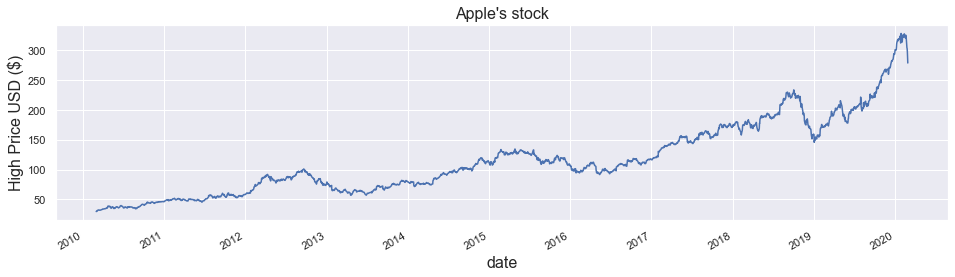

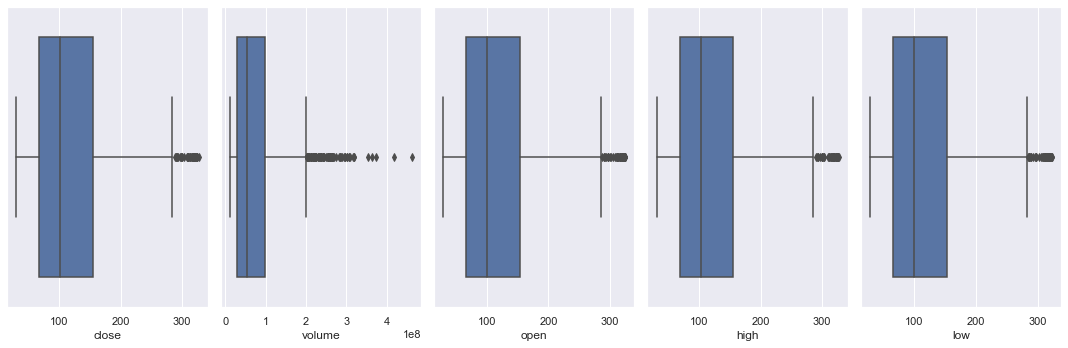

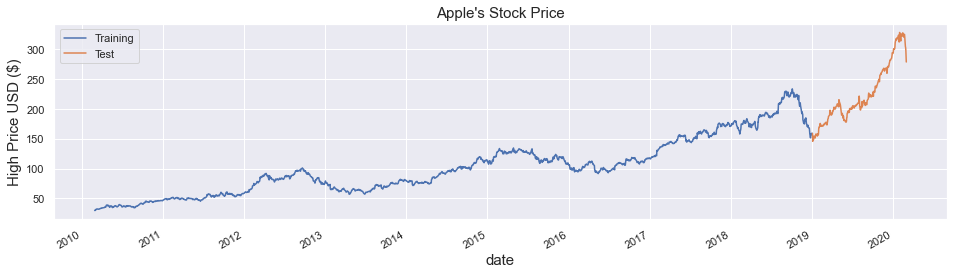

In [1]:
from ipynb.fs.full.Data_Preparation import *
import tensorflow as tf
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [3]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, input_shape = (X_train.shape[1],1)),
    tf.keras.layers.LSTM(32, return_sequences = False),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 64)             16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 30)                990       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 30,333
Trainable params: 30,333
Non-trainable params: 0
_________________________________________________________________


In [4]:
model_lstm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [5]:
hist = model_lstm.fit(X_train, y_train,
                     epochs = 5,
                     batch_size = 1)

Epoch 1/5
2220/2220 [==============================] - 12s 5ms/step - loss: 0.0084 - root_mean_squared_error: 0.0917
Epoch 2/5
2220/2220 [==============================] - 10s 5ms/step - loss: 5.4924e-04 - root_mean_squared_error: 0.0234
Epoch 3/5
2220/2220 [==============================] - 12s 5ms/step - loss: 5.0669e-04 - root_mean_squared_error: 0.0225
Epoch 4/5
2220/2220 [==============================] - 12s 5ms/step - loss: 4.9467e-04 - root_mean_squared_error: 0.0222
Epoch 5/5
2220/2220 [==============================] - 12s 6ms/step - loss: 4.6367e-04 - root_mean_squared_error: 0.0215


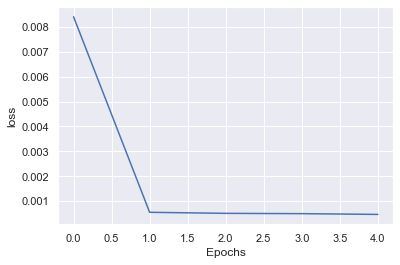

In [6]:
def plot_graphs(hist, string):
  plt.plot(hist.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Plot the accuracy and results 
plot_graphs(hist, "loss")

In [7]:
train_predictions = model_lstm.predict(X_train)
result = scaler.inverse_transform(train_predictions).flatten()
result

array([ 35.928303,  39.099335,  39.595795, ..., 186.3951  , 185.03618 ,
       183.13643 ], dtype=float32)

In [8]:
y_train = y_train.reshape(-1,1)
y_train = scaler.inverse_transform(y_train).flatten()
y_train.shape

(2220,)

In [9]:
train_result = pd.DataFrame(data={'Train Predictions':result, 'Actual':y_train})

In [10]:
train_result

,Train Predictions,Actual
0,35.928303,29.9286
1,39.099335,38.4528
2,39.595795,38.6257
3,40.172955,39.5243
4,40.597321,39.7086
...,...,...
2215,188.900360,190.0600
2216,187.994690,190.3700
2217,186.395096,187.4000
2218,185.036179,186.2200


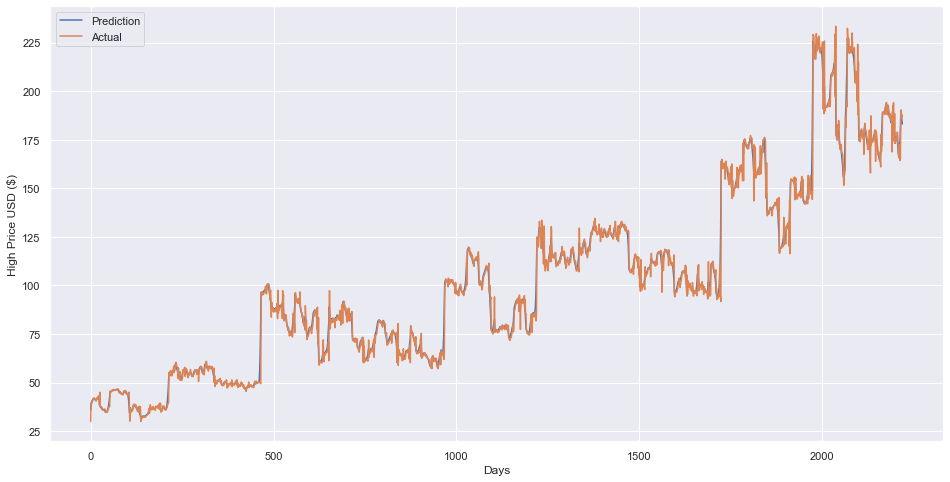

In [11]:
plt.figure(figsize=(16,8))
plt.plot(train_result['Train Predictions'])
plt.plot(train_result['Actual'])
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.legend(['Prediction', 'Actual'])
plt.show()

In [12]:
testing_prediction = model_lstm.predict(X_testing)
result_testing = scaler.inverse_transform(testing_prediction).flatten()

In [13]:
result_testing.shape

(286,)

In [14]:
y_testing = y_testing.reshape(-1,1)
y_testing = scaler.inverse_transform(y_testing).flatten()

In [15]:
y_testing.shape

(286,)

In [16]:
testing_results = pd.DataFrame(data={'Testing Prediction':result_testing, 'Actual': y_testing})
testing_results

,Testing Prediction,Actual
0,213.469116,209.320
1,213.114426,208.550
2,214.177780,207.190
3,209.122147,212.051
4,206.978714,214.420
...,...,...
281,301.233612,323.330
282,302.042023,311.770
283,302.974030,318.400
284,303.107147,324.090


In [17]:
rmse = np.sqrt(np.mean(((result_testing - y_testing) ** 2)))
rmse

21.335990410499765

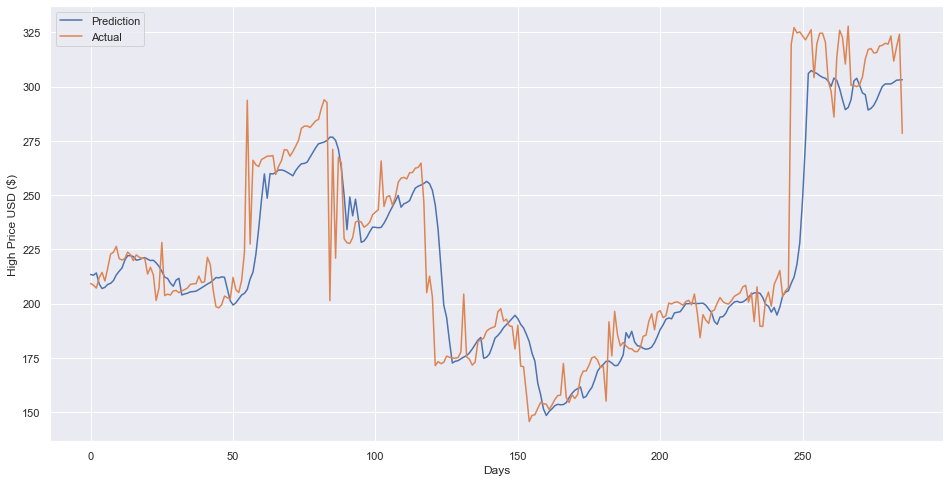

In [18]:
plt.figure(figsize=(16,8))
plt.plot(testing_results['Testing Prediction'])
plt.plot(testing_results['Actual'])
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.legend(['Prediction', 'Actual'])
plt.show()